In [21]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

In [3]:
def error_r3(f):
    return f**3 + 3*(1 - f) * f**2

In [4]:
fs = np.linspace(0, 1)

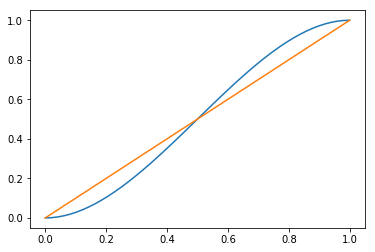

In [5]:
plt.plot(fs, [error_r3(f) for f in fs])
plt.plot(fs, fs)

In [6]:
n = 10000
errors = range(int((n+1)/2), n + 1)

In [7]:
probs = [binom.pmf(x, n, .4) for x in errors]

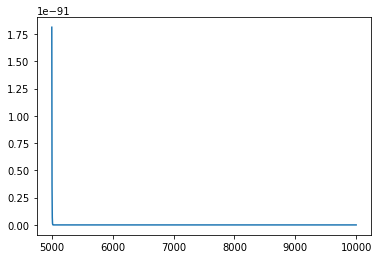

In [8]:
plt.plot(errors, probs)

In [18]:
all_probs = [binom.pmf(x, n, .2) for x in range(1, n + 1)]

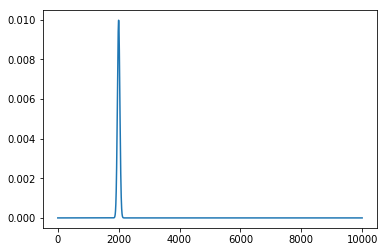

In [19]:
plt.plot(range(1, n + 1), all_probs)

In [4]:
def error_prob(n, f):
    errors = range(int((n+1)/2), n + 1)
    probs = [binom.pmf(x, n, f) for x in errors]
    return sum(probs)

In [5]:
error_prob(3, .1)

0.028000000000000008

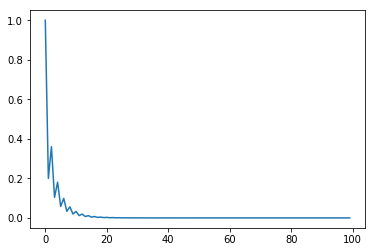

In [22]:
plt.plot(range(100), [error_prob(x, .2) for x in range(100)])

In [15]:
error_prob(70, .2)

2.0547746962292967e-08

In [44]:
n = 1
error = 1
while error > 1e-15:
    error = error_prob(n, .1)
    n += 1
print(n)

64


In [47]:
 64 * (1+(.1 * np.log2(.1) + .9 * np.log2(.9)))

33.984282010286

In [6]:
142*(1+(.2 * np.log2(.2) + .8 * np.log2(.8)))

39.48621052599455

# Ex. 2.4

# Expectation

In [2]:
def urn(N, f):
    prob = []
    for x in range(0, N + 1):
        prob.append(x*binom.pmf(x, N, f)) 
    return sum(prob)

In [3]:
urn(5, 0.2)

1.0

In [4]:
urn(400, 0.2)

79.99999999998758

# Variance and Standard Deviation

In [5]:
def var_desv(N, f):
    res = []
    for x in range(0, N + 1):
        res.append((x**2)*binom.pmf(x, N, f))
    dev = sum(res) - urn(N, f)**2
    
    print ("The Variance is " + str(dev))
    print ("The Standard Deviation is " + str(math.sqrt(dev)))

In [6]:
var_desv(5, 0.2)

The Variance is 0.8
The Standard Deviation is 0.8944271909999159


# Ex. 2.5

In [10]:
trials = []
for i in range(1000):
    trials.append(np.random.choice([1, 0], replace=True, p=[0.2, 0.8], size=5).sum())
np.mean(trials)

0.968

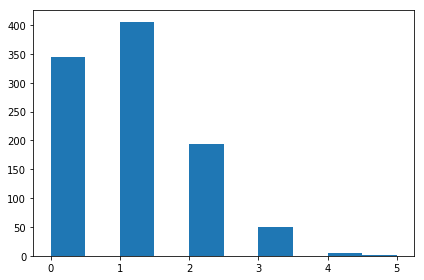

In [11]:
plt.hist(trials)
plt.tight_layout()

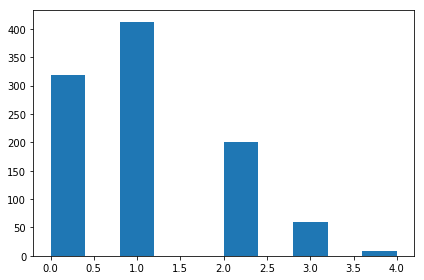

In [12]:
trials_bin = []
for i in range(1000):
    trials_bin.append(np.random.binomial(5, 0.2))
plt.hist(trials_bin)
plt.tight_layout()

In [13]:
def z(N, B, K):
    nb = np.random.choice([1, 0], replace=True, p=[B/K, 1-(B/K)], size=N).sum()
    fb = B/K
    return ((nb - fb*N) ** 2) / (N*fb*(1 - fb))

In [14]:
trials_z = [z(5,1,5) for i in range(10000)]

In [15]:
np.mean(trials_z)

1.01075

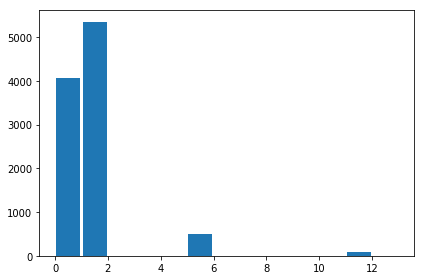

In [16]:
plt.hist(trials_z, bins=range(14), rwidth=0.9)
plt.tight_layout()

In [197]:
4000/10000

0.4

# Ex. 2.6


In [22]:
def urns(N, u):
    prob = []
    res = []
    for x in range(0, N + 1):
        prob.append(binom.pmf(u, N, x/10)) 
    for i in range(0, N + 1):   
        res.append((binom.pmf(u, N, i/10))/(sum(prob)))
    print (res)
    
    return "The most likely urn is urn " + str(res.index(max(res))) + ", with probability " + str(max(res))

In [23]:
urns(10, 3)

[0.0, 0.06307262464852743, 0.22123978796752994, 0.29321985989557936, 0.23625557435790415, 0.1287785055858141, 0.04666776777440084, 0.009892048584565574, 0.000864217921748162, 9.61326393057878e-06, 0.0]


'The most likely urn is urn 3, with probability 0.29321985989557936'